# Project Title (ML Project: Predict Online Payment Fraud)

* We want to predict payment Transaction that are fradulent
* We would perform Exploratory Data Analysis on the Online Data Fraud csv file to gain insight
* We would perform Feature engineering on the data
* We would encode categorical variables, explore correlation
* We would conduct univariate and multivariate analysis on the data
* We would train and test supervised learning model
* We would create 4 different ML algorithms such as Decision Tree, Random Forest, Logistic Regression, KNN
* We would evaluate the model using accuracy, precision and recall
* We would display the confusion matric to reveal the classsification report

In [6]:

#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import other libraries....

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data? paymentfraud.csv
    * how many rows and columns? 1048575 rows , 10 columns
    * does it have missing values? there are no columns with missing values
    * any other significant details code data.info() provides details of the data types of each column

In [4]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
#data = pd.read_csv('bank.csv',sep=';', header=None)
data = pd.read_csv('paymentfraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
#code shows number of rows and columns here we see there are 1048575 rows and 10 columns
data.shape

(1048575, 10)

In [8]:
# code shows the data type on each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
#code shows names of columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [10]:
#Code shows columns with missing value , here there are no missing value in any column
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
#code present the number of rows that do not contain null value or no missing data on each columns 
# from the result all columns contain no null values
data.notna().sum()


step              1048575
type              1048575
amount            1048575
nameOrig          1048575
oldbalanceOrg     1048575
newbalanceOrig    1048575
nameDest          1048575
oldbalanceDest    1048575
newbalanceDest    1048575
isFraud           1048575
dtype: int64

In [12]:
#ode provide the statistic distribution of each column with numeric data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [13]:
# code provides count of column named isFraud where the transaction is fradulent
# in the Code below there are 1142 of rows where transaction is fraud 
datacon = data.isFraud==1
datacon.value_counts()

False    1047433
True        1142
Name: isFraud, dtype: int64

In [14]:
# code creates a variable that stores only numeric data on the file 
# this is done to be able to scertain the correlation that exist between the data
df = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [15]:
#code is used to produce the correlation coefficient that exist between each feature of the data
cor =df.corr()
cor

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

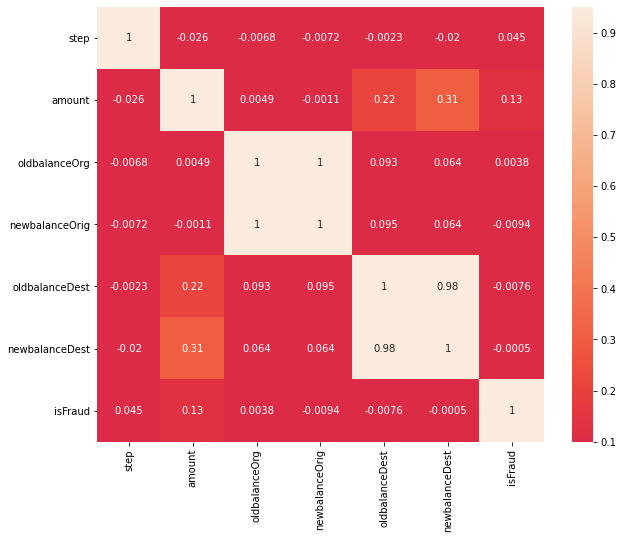

In [13]:
#create the correlation heatmap from the dataset selected to ascertain the correlation coefficient
plt.figure(figsize=(10,8))
sns.heatmap(data = cor, annot=True, cmap = 'rocket', center = 0, vmin =0.1, vmax = 0.95)
# the heatmap visual display shows a correllation between 
# 1) oldbalanceorg & newbalanceOrig, 2) OldbalanceDest & newbalanceDest
# From the visuals the lighter the color the higher the correlation and the darker the color the lower the correlation

<AxesSubplot:>

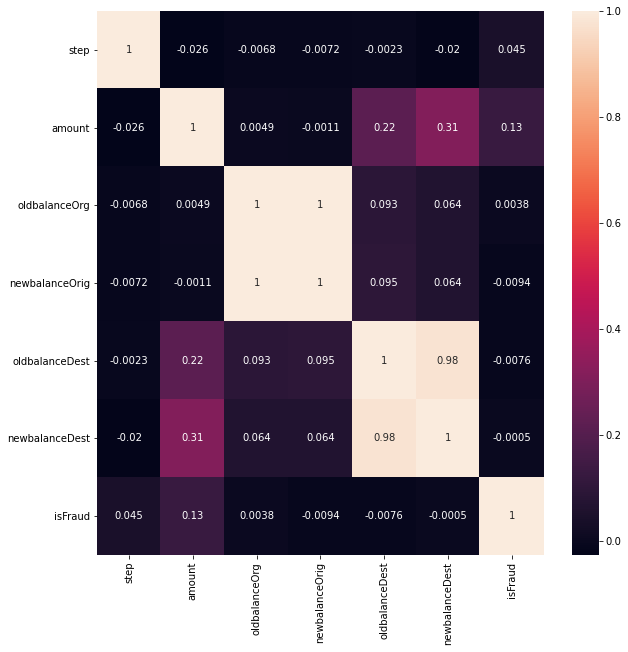

In [16]:
# Code creates correlation heatmap directly from the entire data(note correlation heatmap is only created using numeric data)
# this helps us to see the relationship that exist between the features
#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
# the heatmap visual display shows a correllation between 
# 1) oldbalanceorg & newbalanceOrig, 2) OldbalanceDest & newbalanceDest

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* There no missing value , nor any column data to be replaced
* we are not Removing or deleting any records

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot fraudulent transaction distribution .

> **There will be an explanation or interpretation of the chart in a markdown cell after the chart**

In [17]:
#univariate analysis cells
# Code to show nos of Transaction that is fraud or not 
# less than 100 customers had loan in default

dfe = data.isFraud.value_counts()
#df.plot.barh()
dfe

0    1047433
1       1142
Name: isFraud, dtype: int64

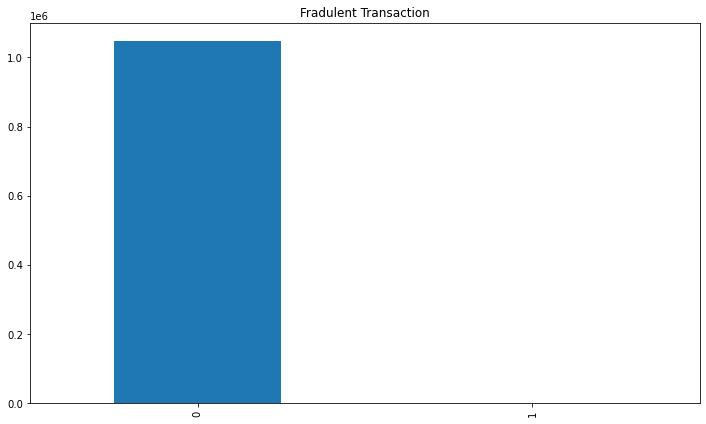

In [17]:
dfe.plot.bar(figsize=(12,7))
plt.title('Fradulent Transaction')
plt.show()

In [ ]:
# we see the number of fradulent transaction is very low compared with nos of none fradulent transaction

Text(0.5, 1.0, 'Types of Transaction')

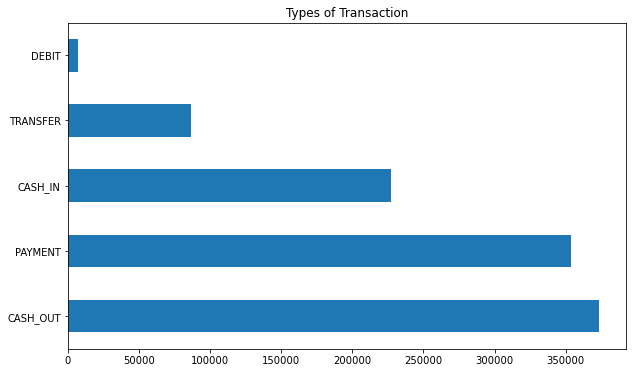

In [18]:
#Code shows us the types of Transaction
tc=data['type'].value_counts()
tc.plot.barh(figsize=(10,6))
plt.title('Types of Transaction')

In [ ]:
# From the Chart Above 'CASH OUT' is the most frequent type of transaction
# Whilst 'DEBIT' is the lowest type of transaction
# Customers prefare cash transaction to card transaction

## Bivariate Analysis

We create charts where I plot only two variables at a time on a chart. 

I use visuals like bar charts, boxplots, scatter plots and so on.

> I will plot variables like steps against amount, etc

> ** An explanation or interpretation of the chartwould be placed in a markdown cell after the chart**

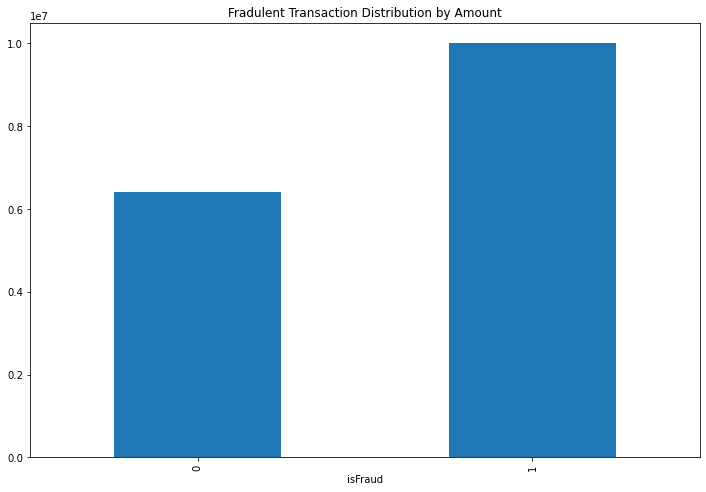

In [19]:
# Code grouped isFraud by Amount
aj = data.groupby('isFraud').amount.max()
aj.plot.bar(figsize=(12,8))
plt.title('Fradulent Transaction Distribution by Amount')
plt.show()

In [ ]:
# The chart displayed above shows that 
# The amount involved in fradulent transaction is higher than the amount involved in none fradulent transaction

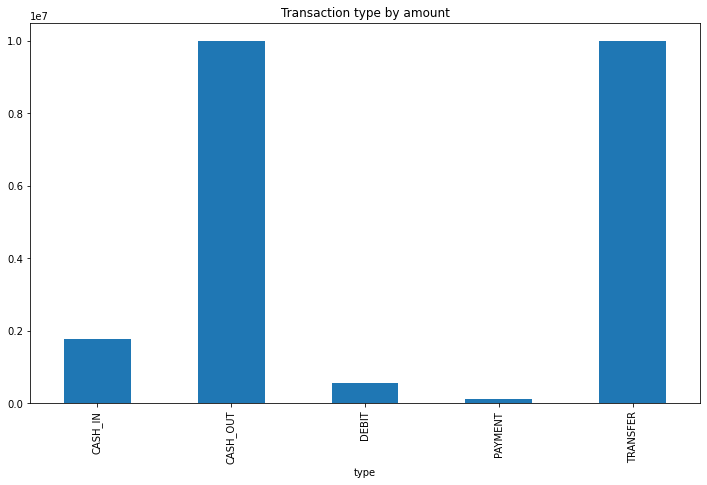

In [20]:
#Code to group transaction type by their amounts
# The code reveals Retred had the highest balance  followed by enterpreneurs and the unemployed had the lowest balance
tya = data.groupby('type').amount.max()
tya.plot.bar(figsize=(12,7))

plt.title('Transaction type by amount')
plt.show()

In [ ]:
# From the Visual 'CASHOU' & 'TRANSFER  both have the highest Maximum transaction amount of (10M) 
# followed by 'CASHIN' wit highest hmaximum transaction amount of les than (2M)
# The lowest maximum transaction amount is  for 'Payment' with the amount being less than a million

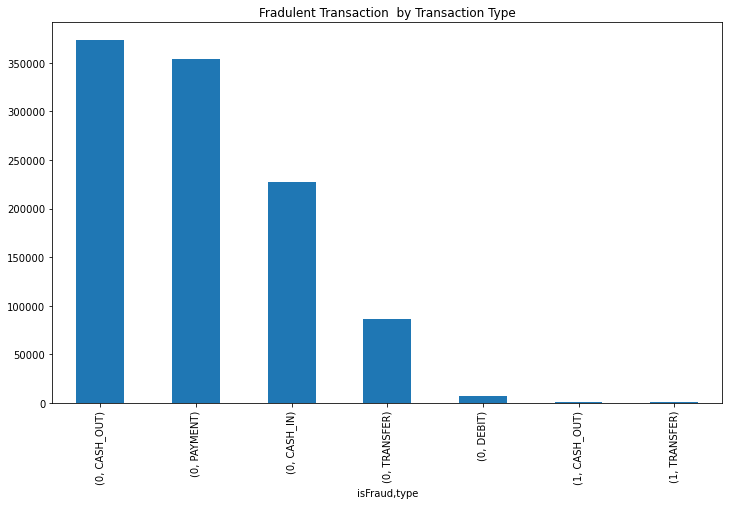

In [21]:
#Code to group type of transaction by which one is fradulent or not 

lb = data.groupby('isFraud').type.value_counts()
lb.plot.bar(figsize=(12,7))

plt.title('Fradulent Transaction  by Transaction Type')
plt.show()

In [ ]:
 #The code reveals Only two types of transaction are used for fraud which are Cash_Out and TRANSFER

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


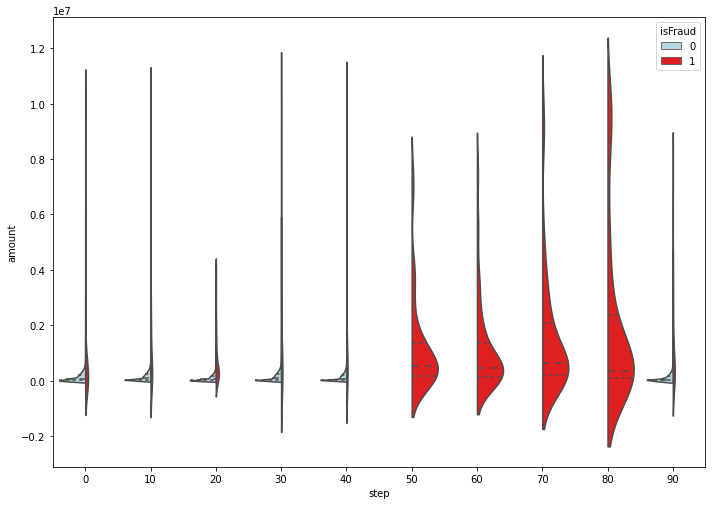

In [22]:
# in this code we created a variable using lambda function to create a distibution for the step range
#We used the step range variable called step group , amount to test if these factors affeted if the transaction was fradulent or not
# We discovered that the Step range of transaction  that are fraudulent  were in the step range of 50 to 80hrs and the amount 
#was between 600k and below with the highest amount of fradulent transaction  less than 12m and most likely fradulent amount was 400k and below
step_group = data.step.map(lambda step:10*(step//10))
sns.axes_style(style=None)
fig, ax= plt.subplots()
fig.set_size_inches(11.7,8.27)
abl = sns.violinplot(step_group,'amount', hue='isFraud', data=data, split=True, inner='quartile', size=25, 
                     palette=['lightblue','red'])


In [ ]:
# We discovered that the Step range of transaction  that are fraudulent  were in the step range of 50 to 80hrs 
# The amount was between 600k and below with the highest amount of fradulent transaction  less than 12m 
# and most likely fradulent amount was 400k and below

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


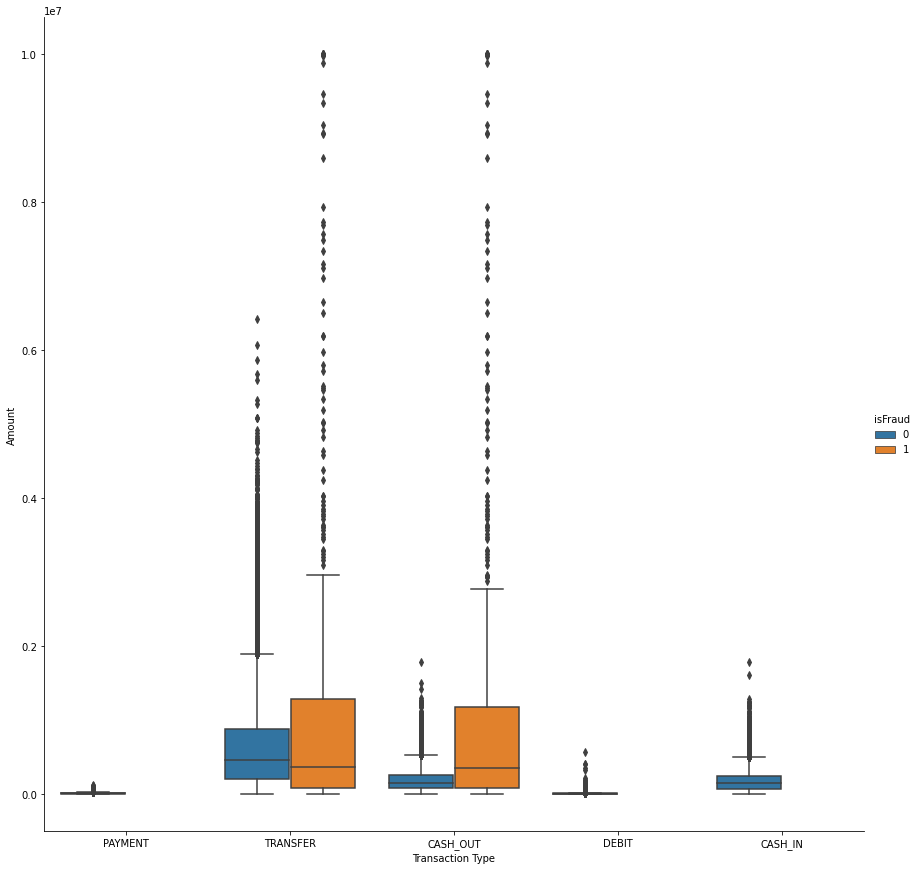

In [23]:
# Code provides outcomes based on Amount of transaction type and whether they were fradulent or not
sns.axes_style(style='ticks')
k = sns.factorplot('type','amount','isFraud',data=data, kind='box', size=12)
k.set_axis_labels('Transaction Type','Amount')

In [ ]:
# We discovered that the likely type of transaction used for Fraud is CASHOUT and TRANSFER 
# The Amount was most likely from 200k and below

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. The Largest amount of Fradulent Transaction was 10m
2. The Step range that was most likely to be involved in fradulent transaction was between 50 and 80hrs
3. The amount that was most likely to be a fradulent transaction was fromm 200k and below
4. The two types of transaction that was mainly used for fraud was cash out and transfer
5. Amount involved in Fradulent transaction was Higer than a non fradulent transaction
6. The most common type of transaction was CASHOUT so customer prefer Cash Transaction to Card Transaction

In [24]:
dr = data.columns
dr

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [25]:
# code to get the data type in order to filter out the categorical data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


# Modelling

In this section, you will train and evaluate your models


## Select Target

In [26]:
#1. select categorical variables
categorical =['type', 'nameOrig', 'nameDest']
categorical

['type', 'nameOrig', 'nameDest']

In [27]:
#code to identify the content on the column naMed 'type' so as to encode it
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [28]:
# Encode the data in the column named 'type'
# change and replace multiple value in data set as per below
data.replace({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5 },inplace=True)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [29]:
# create a dataframe with only categorical data only
categoricala = data[['nameOrig', 'nameDest']]
categoricala.head()

,nameOrig,nameDest
0,C1231006815,M1979787155
1,C1666544295,M2044282225
2,C1305486145,C553264065
3,C840083671,C38997010
4,C2048537720,M1230701703


In [30]:
#we removed the categorical columns so we can use the rest of the data to test and train the model
# we used the list called categoricala and delete all the selected categorical columns at once
#Create a new variable name data2 and place the code to delete the variable called categoricala into it
data2 = data.drop(categoricala, axis=1)
data2
data2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


In [31]:
data2.info()
# we can see all the features of the dataset are now numeric and ready for modelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int64  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 64.0 MB


In [32]:
#We set our target which is 'isFraud' because the problem statement is to design a model to detect fradulent transaction
#we display the first four rows
y = data2.isFraud
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Select Features

In [33]:
# here we set the features by seleting the attributes to be used
# we drop the column that contains the target
features = data2.drop(["isFraud"],axis=1)
features.shape

(1048575, 7)

In [34]:
#we set our x the dependent variables
#we display the first four lines
X = features
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,2,9839.64,170136.0,160296.36,0.0,0.0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0


## Train Test Split

In [35]:
#we import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [36]:
#split into training and validation sets using a 40% split ratio
#X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [37]:
#we display the first four rows of oor training and test data set
print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


         step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
716699    37     1  80320.38            0.0             0.0       721818.70   
941633    43     1  47701.38        20068.0             0.0      1295094.59   

        newbalanceDest  
716699       802139.07  
941633      1884973.43  

         step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
792777    40     1  60814.89            0.0            0.00       520403.88   
50582      9     2   4928.26        21036.0        16107.74            0.00   

        newbalanceDest  
792777       581218.77  
50582             0.00  

 716699    0
941633    0
Name: isFraud, dtype: int64

 792777    0
50582     0
Name: isFraud, dtype: int64


## Import ML algorithms and initialize them

In [38]:
# We initialize logistic regression
#we import the library
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


## Train and Test the models

In [39]:
#we fit the training data set
LR.fit(X_train,y_train)

LogisticRegression()

In [40]:
#we set out test data
LR_preds = LR.predict(X_test)

In [41]:
#we import the accuracy library to test the level of accuracy of the model
from sklearn.metrics import accuracy_score

In [42]:
#we print out the accuracy score
print(accuracy_score(LR_preds,y_test))

0.9990105619531269


In [43]:
#we import the classification library to view the recall and precision value
from sklearn.metrics import classification_report
#print classification report
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419135
           1       0.37      0.58      0.45       295

    accuracy                           1.00    419430
   macro avg       0.68      0.79      0.72    419430
weighted avg       1.00      1.00      1.00    419430



In [44]:
#we import the confusion matrix library to view the performance of the classification algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

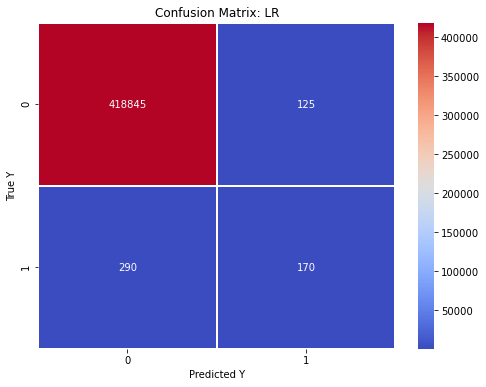

In [45]:
cmLR = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cmLR,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

The model results is explained below from the confusion matrix 
* Where 0 = Non Fradulent Transaction and 1 = Fradulent Transaction
* The true positives = 418847 model correctly predicts non Fradulent Transaction
* False Positives =122 model incorrectly predicts the non Fradulent Transaction 
* False Negative = 300 model incorrectly predicts Fradulent Transaction
* True Negatives = 161 model correctly predicts Fradulent Transaction
* The model predicted that 418847+ 122= 418969/419430 (99.89%) transaction  were not Fradulent Transaction  
* when there was actually 418847+300 = 419147/419430 (99.93%) transaction were not fradulent transaction
* our model has accuracy of 418847+161 =419008/419430 (99.89%)  Formula:TP+TN/Total Prediction
* The recall of the model is equal to 418847/(418847+161)=418847/419008 (99.96%) Formula: TP/TP+FN


In [46]:
# We initialize k neighbors
#we import the library 
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#k_model = KNeighborsClassifier()
KN = KNeighborsClassifier()

In [48]:
KN.fit(X_train,y_train)


KNeighborsClassifier()

In [49]:
k_preds=KN.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(k_preds,y_test))

In [ ]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, k_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418970
           1       0.78      0.56      0.65       460

    accuracy                           1.00    419430
   macro avg       0.89      0.78      0.83    419430
weighted avg       1.00      1.00      1.00    419430



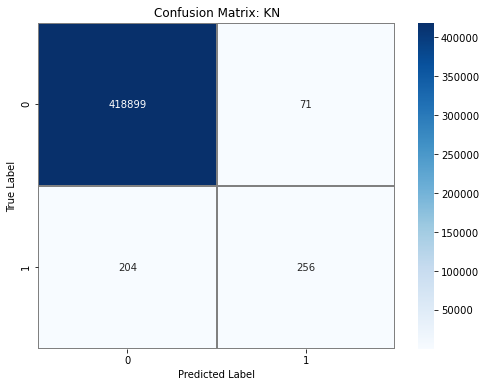

In [52]:
cm_ = confusion_matrix(y_test, k_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_,
cmap='Blues',
linecolor='grey',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

The model results is explained below from the confusion matrix 
* Where 0 = Non Fradulent Transaction and 1 = Fradulent Transaction
* The true positives = 418901 model correctly predicts non Fradulent Transaction
* False Positives =68 model incorrectly predicts the non Fradulent Transaction 
* False Negative = 215 model incorrectly predicts Fradulent Transaction
* True Negatives = 246 model correctly predicts Fradulent Transaction
* The model predicted that 418901+ 68= 418969/419430 (99.89%) transaction  were not Fradulent Transaction  
* when there was actually 418901+215 = 419116/419430 (99.92%) transaction were not fradulent transaction
* our model has accuracy of 418901+246 =419147/419430 (99.93%) Formula:TP+TN/Total Prediction
* The recall of the model is equal to 418901/(418901+246)=418901/419147 (99.94%) formula: TP/TP+FN


In [55]:
#TODO: initialize decision tree
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()


In [56]:
DC.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
DC_preds2 = DC.predict(X_test)

In [58]:
print('Actual Y:', y.head().tolist())
print('Predicted Y:', DC_preds2[:5])

Actual Y: [0, 0, 1, 1, 0]
Predicted Y: [0 0 0 0 0]


In [59]:
print(accuracy_score(DC_preds2,y_test))

0.999601840593186


In [60]:
print(classification_report(y_test, DC_preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418970
           1       0.83      0.80      0.81       460

    accuracy                           1.00    419430
   macro avg       0.92      0.90      0.91    419430
weighted avg       1.00      1.00      1.00    419430



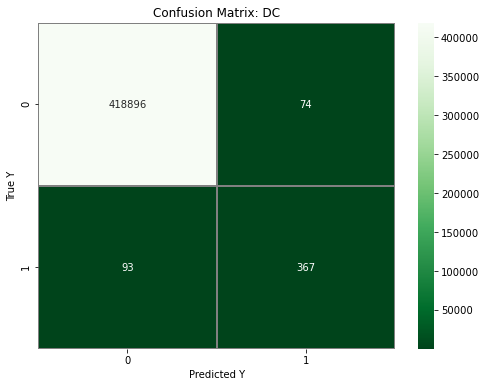

In [61]:
cmDC = confusion_matrix(y_test, DC_preds2)
plt.figure(figsize=(8, 6))
sns.heatmap(cmDC,
cmap='Greens_r',
linecolor='grey',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

The model results is explained below from the confusion matrix 
* Where 0 = Non Fradulent Transaction and 1 = Fradulent Transaction
* The true positives = 418888 model correctly predicts non Fradulent Transaction
* False Positives =81 model incorrectly predicts the non Fradulent Transaction 
* False Negative = 93 model incorrectly predicts Fradulent Transaction
* True Negatives = 368 model correctly predicts Fradulent Transaction
* The model predicted that 418888+81 = 418969/419430 (99.89%) transaction  were not Fradulent Transaction  
* when there was actually 418888+93 = 418981/419430 (99.89%) transaction were not fradulent transaction
* our model has accuracy of 418888+363 =419251/419430 (99.95%) Formula: TP+TN/Total Prediction
* The recall of the model is equal to 418888/(418888+93)=418888/418981 (99.98%) formula: TP/TP+FN


In [62]:
#TODO: initialize random forest
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier()
RF

RandomForestClassifier()

In [67]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
RF_preds = RF.predict(X_test)

In [69]:
print(accuracy_score(RF_preds,y_test))

0.9997591970054598


In [70]:
print(classification_report(RF_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419061
           1       0.79      0.99      0.88       369

    accuracy                           1.00    419430
   macro avg       0.90      0.99      0.94    419430
weighted avg       1.00      1.00      1.00    419430



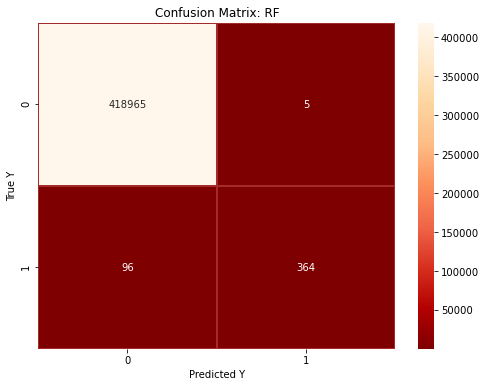

In [71]:
cmRF = confusion_matrix(y_test, RF_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF,
cmap='OrRd_r',
linecolor='brown',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

The model results is explained below from the confusion matrix 
* Where 0 = Non Fradulent Transaction and 1 = Fradulent Transaction
* The true positives = 418965 model correctly predicts non Fradulent Transaction
* False Positives =94 model incorrectly predicts the non Fradulent Transaction 
* False Negative = 4 model incorrectly predicts Fradulent Transaction
* True Negatives = 367 model correctly predicts Fradulent Transaction
* The model predicted that 418965+4 = 418969/419430 (99.89%) transaction  were not Fradulent Transaction  
* when there was actually 418965+93 = 419058/419430 (99.91%) transaction were not fradulent transaction
* our model has accuracy of 418965+367 =419332/419430 (99.97%) Formula: TP+TN/Total Prediction
* The recall of the model is equal to 418965/(418965+4)=418965/418969 (99.99%) formula: TP/TP+FN


In [72]:
#create list of your model names
models = [LR,KN,DC,RF]
models

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [75]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [76]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.9990105619531269 


For KNeighborsClassifier, Accuracy score is 0.9993443482821925 


For DecisionTreeClassifier, Accuracy score is 0.9995994564051213 


For RandomForestClassifier, Accuracy score is 0.999756812817395 



In [79]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_test)
    #print evaluation metric
    print('\nFor {}, classification_report is {} \n'.format(models.__class__.__name__,classification_report(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [81]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419135
           1       0.37      0.58      0.45       295

    accuracy                           1.00    419430
   macro avg       0.68      0.79      0.72    419430
weighted avg       1.00      1.00      1.00    419430
 


For KNeighborsClassifier, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    419103
           1       0.56      0.78      0.65       327

    accuracy                           1.00    419430
   macro avg       0.78      0.89      0.83    419430
weighted avg       1.00      1.00      1.00    419430
 


For DecisionTreeClassifier, classification_report is               precision    recall  f1-score   support

           0       1.00      1.00      1.00    418979
           1       0.81      0.82      0.81       451

    accuracy          

In [ ]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh(figsize=(10, 7))

plt.title('Feature importances for random forest')
plt.show()
#plt.figure(figsize=(25, 20))

In [ ]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

In [ ]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [ ]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X_train,y_train)

## Summary

What model should be deployed to production?
Any other comments?

In [ ]:
RandomForestClassifier